# Twitter Sentiment Analysis

### Load Data

In [1]:
# bring in twitter data
import pandas as pd
import json

tweets = []

txt_ = open('smilies_output.txt', 'r').read()
for line in txt_.split('\n'):
    tweets.append(line)

In [2]:
listjson = []
for tweet in tweets:
    try:
        listjson.append(json.loads(tweet))
    except:
        pass

In [3]:
listjson[0]

{'created_at': 'Thu Jan 07 16:38:11 +0000 2021',
 'id': 1347221002191831044,
 'id_str': '1347221002191831044',
 'text': 'RT @burgerbot_: leftover a3 merch thread, pick whatever u want, only pay shipping ♡\n\ni got the rest of my kazunari lot in today and it had…',
 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 1109236550762708992,
  'id_str': '1109236550762708992',
  'name': "ganyu's wife ✨",
  'screen_name': 'burgerbot_',
  'location': 'USA ✧ 24 ✧ they/he/hy',
  'url': 'http://kazukai.carrd.co/',
  'description': 'through spark and flame, i got your back ✧ no qrt ✧ rt heavy ✧ please read carrd byf',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 426,
  'friends_count': 515,
  'listed_count': 

In [4]:
from IPython.display import JSON

JSON(listjson[:2])

<IPython.core.display.JSON object>

In [6]:
listjson[0]['retweeted_status']['extended_tweet']['full_text']

'leftover a3 merch thread, pick whatever u want, only pay shipping ♡\n\ni got the rest of my kazunari lot in today and it had a lot of bundles so i figured i would share with everyone! hoping to find a good home for all these best boys :)'

In [7]:
listjson[3]['text']

'@beautdahyun__ @trulydoies im so sorry for your loss :( sending my deepest condolences for her family... may her rest in peace'

In [8]:
len(listjson)

4020

In [9]:
text_only = []
for i in range(0,len(listjson)):
    tweet = listjson[i]['text']
    text_only.append(tweet)

In [10]:
df = pd.DataFrame(text_only, columns=['text'])

In [11]:
df.head()

,text
0,"RT @burgerbot_: leftover a3 merch thread, pick..."
1,RT @Showing_Off_: What my patient sees vs. Wha...
2,love 🥺💘🥺💘
3,@beautdahyun__ @trulydoies im so sorry for you...
4,oomfs u follow a trump supporter pls unfollow ...


In [12]:
# looks like some tweets are truncated... check to see how many have the smiley cut off
df[(df['text'].str.contains(':\)') == False) & (df['text'].str.contains(':\(') == False)].count()

text    803
dtype: int64

In [13]:
# drop these from df
to_drop = df[(df['text'].str.contains(':\)') == False) & (df['text'].str.contains(':\(') == False)]

In [14]:
df.drop(labels=to_drop.index, axis=0, inplace=True)

In [15]:
df.count()

text    3217
dtype: int64

### Create target label

In [16]:
# set label where :) = 1 and :( = 0)
import numpy as np

df['label'] = np.where(df['text'].str.contains(":\)"), 1, 0)

In [17]:
df.head()

,text,label
1,RT @Showing_Off_: What my patient sees vs. Wha...,1
3,@beautdahyun__ @trulydoies im so sorry for you...,0
4,oomfs u follow a trump supporter pls unfollow ...,1
5,"RT @Danny_Dark_O: It’s okay, he still has Twit...",1
7,RT @btsarmy2018x: Jungkook’s love for pizza is...,0


### Clean Text

In [18]:
# import regex
import re

# import nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [19]:
df.iloc[0]['text']

'RT @Showing_Off_: What my patient sees vs. What the internet sees :) https://t.co/haFQ4vdipy'

In [20]:
processed_text = []

for row in range(df.shape[0]):
    doc = df.iloc[row]['text']
    words = word_tokenize(doc)
    # Remove all the special characters
    words = [word for word in words if word.isalpha()]

    # remove all characters less than 2
    words = [word for word in words if len(word) > 2]

    # Converting to Lowercase
    words = [word.lower() for word in words]
    
    new_text = " ".join(words)
    processed_text.append(new_text)

In [21]:
processed_text[:10]

['what patient sees what the internet sees https',
 'trulydoies sorry for your loss sending deepest condolences for her family may her rest peace',
 'oomfs follow trump supporter pls unfollow https',
 'okay still has twitter until the tweet',
 'jungkook love for pizza the cutest thing https',
 'flowkv you guys know this what happened malaysia recently https',
 'aww sorry hope isn dick you today those texts last were ridiculous here you need',
 'bestialwraths respect you guys wan name names but will https',
 'sad but that how will',
 'unknxwnsxuls hey new this account and great you could this can get more moots any fandom']

In [22]:
df['processed_text'] = processed_text

In [23]:
df.head()

,text,label,processed_text
1,RT @Showing_Off_: What my patient sees vs. Wha...,1,what patient sees what the internet sees https
3,@beautdahyun__ @trulydoies im so sorry for you...,0,trulydoies sorry for your loss sending deepest...
4,oomfs u follow a trump supporter pls unfollow ...,1,oomfs follow trump supporter pls unfollow https
5,"RT @Danny_Dark_O: It’s okay, he still has Twit...",1,okay still has twitter until the tweet
7,RT @btsarmy2018x: Jungkook’s love for pizza is...,0,jungkook love for pizza the cutest thing https


### Check for class imbalance

In [24]:
# check for class imbalance
smile = df[df['label'] == 1].text.count()
sad = df[df['label'] == 0].text.count()
print(f'smiles: {smile}')
print(f'unhappy: {sad}')

smiles: 2185
unhappy: 1032


In [25]:
# note the imbalance...oversample to create balanced dataset
class_0 = df.loc[df['label']==0]
class_1 = df.loc[df['label']==1]

class_0_sample = class_0.sample(n=2185, replace=True)

from sklearn.utils import shuffle
balanced_df = pd.concat([class_1, class_0_sample], axis=0)
balanced_df = shuffle(balanced_df)

In [26]:
balanced_df.shape

(4370, 3)

In [27]:
balanced_df[balanced_df['label'] == 0].text.count()

2185

### Transform and train-test split

In [28]:
# vectorize processed text
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))

In [29]:
transformed_text = vectorizer.fit_transform(df['processed_text'])

In [30]:
# split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_text, df['label'], test_size=0.3, random_state=44)

In [31]:
# balanced train test split
Btransformed_text = vectorizer.fit_transform(balanced_df['processed_text'])

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Btransformed_text, balanced_df['label'], test_size=0.3, random_state=44)

In [32]:
# densify sparse matrices for modelling
X_train = X_train.todense()
X_test = X_test.todense()
Xb_train = Xb_train.todense()
Xb_test = Xb_test.todense()

### Baseline Logistic Regression Model

In [33]:
# baseline logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test,y_test)
y_pred = classifier.predict(X_test)

print('Train Accuracy:', train_score)
print('Test Accuracy:', test_score)
rep = classification_report(y_test, y_pred)
print(rep)

Train Accuracy: 0.7849844513549533
Test Accuracy: 0.7556935817805382
              precision    recall  f1-score   support

           0       0.71      0.35      0.47       296
           1       0.76      0.94      0.84       670

    accuracy                           0.76       966
   macro avg       0.74      0.64      0.65       966
weighted avg       0.75      0.76      0.73       966



In [34]:
# Not bad...let's try the balanced dataset
classifier = LogisticRegression()
classifier.fit(Xb_train,yb_train)

train_score = classifier.score(Xb_train, yb_train)
test_score = classifier.score(Xb_test,yb_test)
yb_pred = classifier.predict(Xb_test)

print('Train Accuracy:', train_score)
print('Test Accuracy:', test_score)
rep = classification_report(yb_test, yb_pred)
print(rep)

Train Accuracy: 0.8241255312193527
Test Accuracy: 0.7589626239511823
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       631
           1       0.81      0.70      0.75       680

    accuracy                           0.76      1311
   macro avg       0.76      0.76      0.76      1311
weighted avg       0.77      0.76      0.76      1311



### Try Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=4)

In [36]:
# imbalanced
classifier.fit(X_train,y_train)

train_score = classifier.score(X_train, y_train)
test_score = classifier.score(X_test,y_test)
y_pred = classifier.predict(X_test)

print('Train Accuracy:', train_score)
print('Test Accuracy:', test_score)
rep = classification_report(y_test, y_pred)
print(rep)

Train Accuracy: 0.9266992447800977
Test Accuracy: 0.7463768115942029
              precision    recall  f1-score   support

           0       0.62      0.44      0.51       296
           1       0.78      0.88      0.83       670

    accuracy                           0.75       966
   macro avg       0.70      0.66      0.67       966
weighted avg       0.73      0.75      0.73       966



In [37]:
# balanced 
classifier = RandomForestClassifier(n_estimators=100, random_state=4)
classifier.fit(Xb_train,yb_train)

train_score = classifier.score(Xb_train, yb_train)
test_score = classifier.score(Xb_test,yb_test)
yb_pred = classifier.predict(Xb_test)

print('Train Accuracy:', train_score)
print('Test Accuracy:', test_score)
rep = classification_report(yb_test, yb_pred)
print(rep)

Train Accuracy: 0.9401765282772148
Test Accuracy: 0.8283752860411899
              precision    recall  f1-score   support

           0       0.77      0.91      0.84       631
           1       0.90      0.75      0.82       680

    accuracy                           0.83      1311
   macro avg       0.84      0.83      0.83      1311
weighted avg       0.84      0.83      0.83      1311



In [38]:
# better results with RF, some overfitting

### Tokenize

In [39]:
# tokenize inputs for modelling to address sparse matrix
# work with Balanced datset from here on out
from keras.preprocessing.text import Tokenizer

Xb_train, Xb_test, yb_train, yb_test = train_test_split(balanced_df['processed_text'], balanced_df['label'], test_size=0.3, random_state=44)

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Xb_train)

Xb_train = tokenizer.texts_to_sequences(Xb_train)
Xb_test = tokenizer.texts_to_sequences(Xb_test)

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

print(Xb_train[2])


[2239, 56, 84, 2240, 1004, 1005, 16, 210, 490, 3, 243, 33, 1005, 2241, 2242, 87, 115, 123, 1]


In [40]:
# use 0's for padding, so that all sequences are the same length
from keras.preprocessing.sequence import pad_sequences

maxlen = 280

Xb_train = pad_sequences(Xb_train, padding='post', maxlen=maxlen)
Xb_test = pad_sequences(Xb_test, padding='post', maxlen=maxlen)

print(Xb_train[0, :])

[2237 1404   37  260 1405  552 1406   19    5   55 1407 1404 1407    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [46]:
Xb_train.shape

(3059, 280)

In [47]:
Xb_test.shape

(1311, 280)

In [48]:
yb_train.shape

(3059,)

In [49]:
yb_test.shape

(1311,)

### CNN Model

In [41]:
# build model with one hidden layer
from keras.models import Sequential
from keras import layers

embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 280, 50)           258200    
_________________________________________________________________
flatten (Flatten)            (None, 14000)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                140010    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 398,221
Trainable params: 398,221
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(Xb_train, yb_train,
                   epochs=100,
                   verbose=False,
                   validation_data=(Xb_test, yb_test),
                   batch_size=10)

In [43]:
# create helper function to plot accuracy history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

Training Accuracy: 0.5080
Testing Accuracy:  0.4813


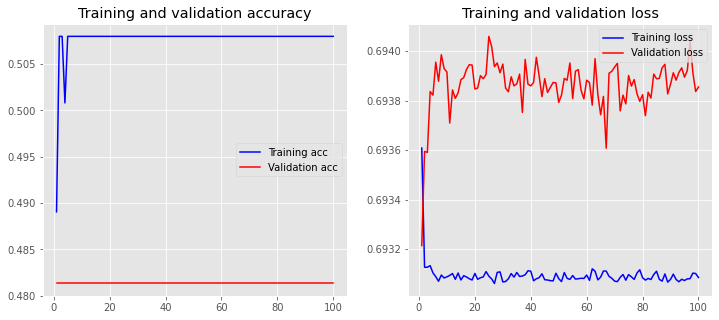

In [53]:
loss, accuracy = model.evaluate(Xb_train, yb_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xb_test, yb_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

yb_pred = model.predict(Xb_test)

In [54]:
from keras.backend import clear_session
clear_session()

In [55]:
# let's try pooling
embedding_dim = 50

model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 280, 50)           258200    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 258,721
Trainable params: 258,721
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9971
Testing Accuracy:  0.8566


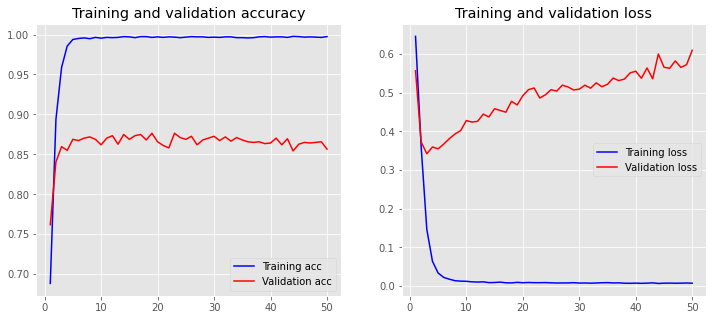

In [56]:
# check model performance
history = model.fit(Xb_train, yb_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(Xb_test, yb_test),
                    batch_size=10)

loss, accuracy = model.evaluate(Xb_train, yb_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xb_test, yb_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [57]:
from keras.backend import clear_session
clear_session()

In [58]:
# try adding CNN layer
embedding_dim = 100

model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
model.add(layers.Conv1D(128, 5, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 280, 100)          516400    
_________________________________________________________________
conv1d (Conv1D)              (None, 276, 128)          64128     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                1290      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 581,829
Trainable params: 581,829
Non-trainable params: 0
_________________________________________________________________


In [59]:
# evaluate
history = model.fit(Xb_train, yb_train,
                    epochs=10,
                    verbose=False,
                    validation_data=(Xb_test, yb_test),
                    batch_size=10)

Training Accuracy: 0.9964
Testing Accuracy:  0.8642


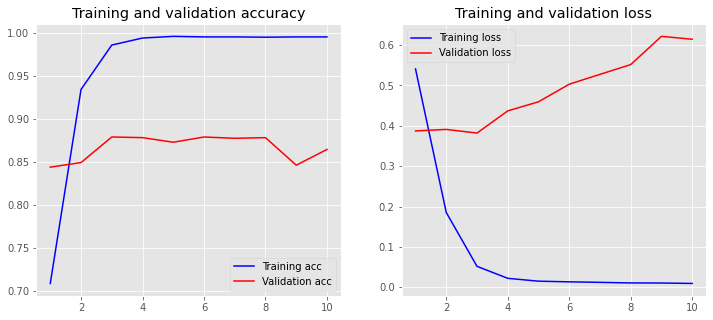

In [60]:
loss, accuracy = model.evaluate(Xb_train, yb_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xb_test, yb_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [61]:
from keras.backend import clear_session
clear_session()

In [62]:
# try a few more epochs
history = model.fit(Xb_train, yb_train,
                    epochs=50,
                    verbose=False,
                    validation_data=(Xb_test, yb_test),
                    batch_size=10)

Training Accuracy: 0.9974
Testing Accuracy:  0.8551


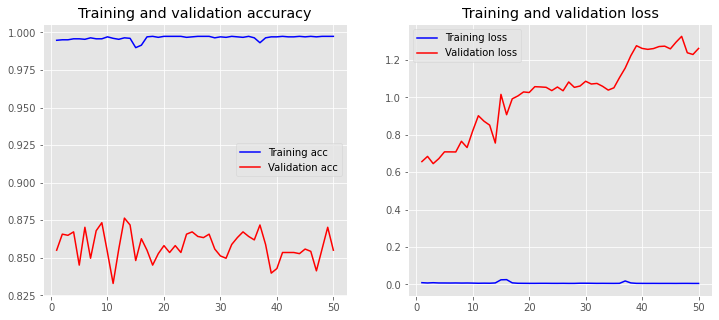

In [63]:
loss, accuracy = model.evaluate(Xb_train, yb_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xb_test, yb_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [64]:
# Okay. Try GloVe for word embedding
# create helper function to do so
import numpy as np

def create_embedding_matrix(filepath, word_index, embedding_dim):
    vocab_size = len(word_index) + 1  # Adding again 1 because of reserved 0 index
    embedding_matrix = np.zeros((vocab_size, embedding_dim))

    with open(filepath) as f:
        for line in f:
            word, *vector = line.split()
            if word in word_index:
                idx = word_index[word] 
                embedding_matrix[idx] = np.array(
                    vector, dtype=np.float32)[:embedding_dim]

    return embedding_matrix

In [65]:
# retrieve embedding matrix
embedding_dim = 50
embedding_matrix = create_embedding_matrix(
    'glove/glove.6B.50d.txt',
    tokenizer.word_index, embedding_dim)

In [66]:
# check embedding vectors
nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix))
nonzero_elements / vocab_size

0.00019364833462432224

In [67]:
# use matrix in model with pooling layer (no CNN)
model = Sequential()
model.add(layers.Embedding(vocab_size, embedding_dim, 
                           weights=[embedding_matrix], 
                           input_length=maxlen, 
                           trainable=True))

model.add(layers.GlobalMaxPool1D())
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 280, 50)           258200    
_________________________________________________________________
global_max_pooling1d (Global (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 258,721
Trainable params: 258,721
Non-trainable params: 0
_________________________________________________________________


Training Accuracy: 0.9967
Testing Accuracy:  0.8482


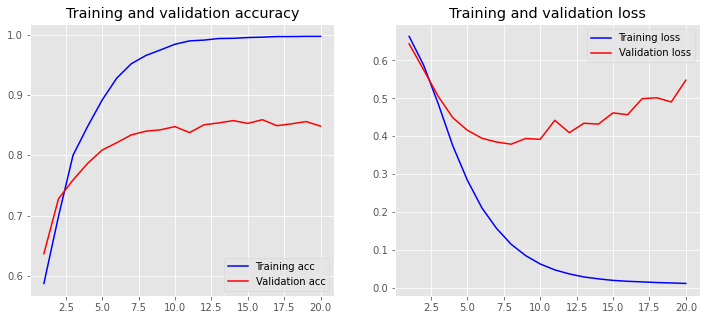

In [68]:
# check performace
history = model.fit(Xb_train, yb_train,
                    epochs=20,
                    verbose=False,
                    validation_data=(Xb_test, yb_test),
                    batch_size=10)

loss, accuracy = model.evaluate(Xb_train, yb_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(Xb_test, yb_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [148]:
# define parameter grid
param_grid = dict(num_filters=[32, 64, 128],
                  kernel_size=[3, 5, 7],
                  vocab_size=[5000], 
                  embedding_dim=[50],
                  maxlen=[280])

In [149]:
# try grid CNN search 
def create_model(num_filters, kernel_size, vocab_size, embedding_dim, maxlen):
    model = Sequential()
    model.add(layers.Embedding(vocab_size, embedding_dim, input_length=maxlen))
    model.add(layers.Conv1D(num_filters, kernel_size, activation='relu'))
    model.add(layers.GlobalMaxPooling1D())
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [150]:
# grid search
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV

# Main settings
epochs = 20
embedding_dim = 50
maxlen = 280
output_file = 'output.txt'

model = KerasClassifier(build_fn=create_model,
                            epochs=epochs, batch_size=10,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(Xb_train, yb_train)

# Evaluate testing set
test_accuracy = grid.score(Xb_test, yb_test)
train_accuracy = grid.score(Xb_train, yb_train)

print(f'Accuracy {train_accuracy}')
print(f'Accuracy {test_accuracy}')
print(f'best params: {grid_result.best_params_}')


Fitting 4 folds for each of 5 candidates, totalling 20 fits
Accuracy 0.8642258048057556
Accuracy 0.8642258048057556
best params: {'vocab_size': 5000, 'num_filters': 128, 'maxlen': 280, 'kernel_size': 3, 'embedding_dim': 50}
